In [1]:
import music21 as m21
import os
from GridMLM_tokenizers import CSGridMLMTokenizer
import numpy as np
from generate_utils import overlay_generated_harmony
import matplotlib.pyplot as plt
from tqdm import tqdm

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '/media/maindisk/data/hooktheory_midi_hr/CA_train/'
# data_dir = '/media/maindisk/data/gjt_melodies/gjt_CA/'
data_files = []
for dirpath, _, filenames in os.walk(data_dir):
    for file in filenames:
        if file.endswith('.mid') or file.endswith('.midi') or file.endswith('.mxl') or file.endswith('.xml'):
            full_path = os.path.join(dirpath, file)
            data_files.append(full_path)
print(len(data_files))

14676


In [3]:
tokenizer = CSGridMLMTokenizer(fixed_length=256)

In [4]:
print(data_files[0])
x = tokenizer.encode( data_files[0] )
print(x['input_tokens'])

/media/maindisk/data/hooktheory_midi_hr/CA_train/11363_muse_the-small-print_chorus.mid
['<bar>', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', '<bar>', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', '<bar>', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', '<bar>', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', '<bar>', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'D:min', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', 'E:maj', '<bar>', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'A:min', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:

In [15]:
# x = tokenizer.encode( 'example_inputs/test_midi_constraints.mid', keep_durations=True )
x = tokenizer.encode( data_files[10], keep_durations=True )
print(x['input_tokens'])
print(len(x['input_tokens']))
print(x.keys())
print(x['skip_steps'])
print(x['ql_per_quantum'])
print(x['pianoroll'].shape)
print(x['harmonic_rhythm_density'])
print(x['harmonic_complexity'])
print(x['conditions'])

['<bar>', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', 'A#:maj', '<bar>', 'A#:maj', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'E:min', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'E:min', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<bar>', 'C:maj', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<nc>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'

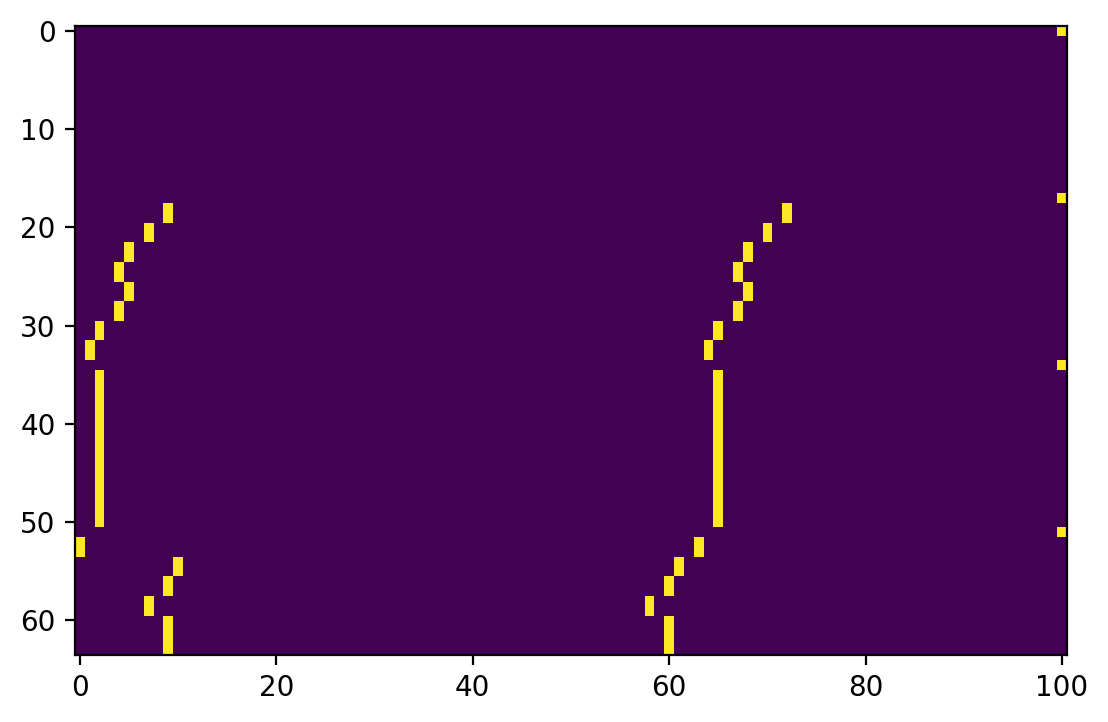

In [6]:
plt.imshow(x['pianoroll'][:64,:])

In [7]:
s = overlay_generated_harmony(x['melody_part'], x['input_tokens'], x['ql_per_quantum'], x['skip_steps'])

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/music21/base.py:559: UserWarning: Setting an ID that could be mistaken for a memory location is discouraged: got 126281458992480
  warnings.warn(msg)


In [8]:
# stats on harmonic rhythm density and complexity
h_rhythm = []
h_complexity = []
for i in tqdm(range(min(len(data_files) , 1000))):
    x = tokenizer.encode( data_files[1000 + i] )
    h_rhythm.append(x['harmonic_rhythm_density'])
    h_complexity.append(x['harmonic_complexity'])

100%|██████████| 1000/1000 [00:29<00:00, 34.30it/s]


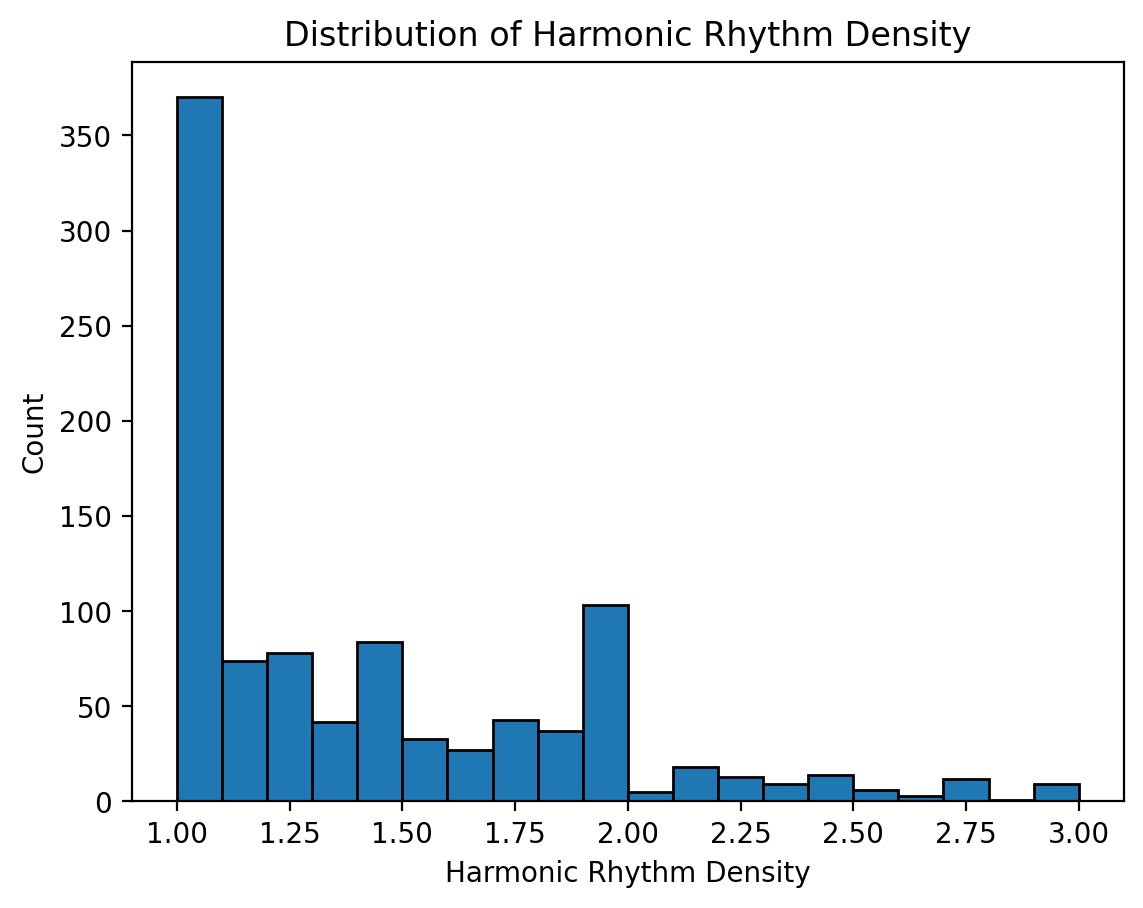

In [9]:
bins = np.arange(1, 3.1, 0.1)  # bins from 1 to 3 with step 0.1
plt.hist(h_rhythm, bins=bins, edgecolor='black')
plt.xlabel('Harmonic Rhythm Density')
plt.ylabel('Count')
plt.title('Distribution of Harmonic Rhythm Density')
plt.show()

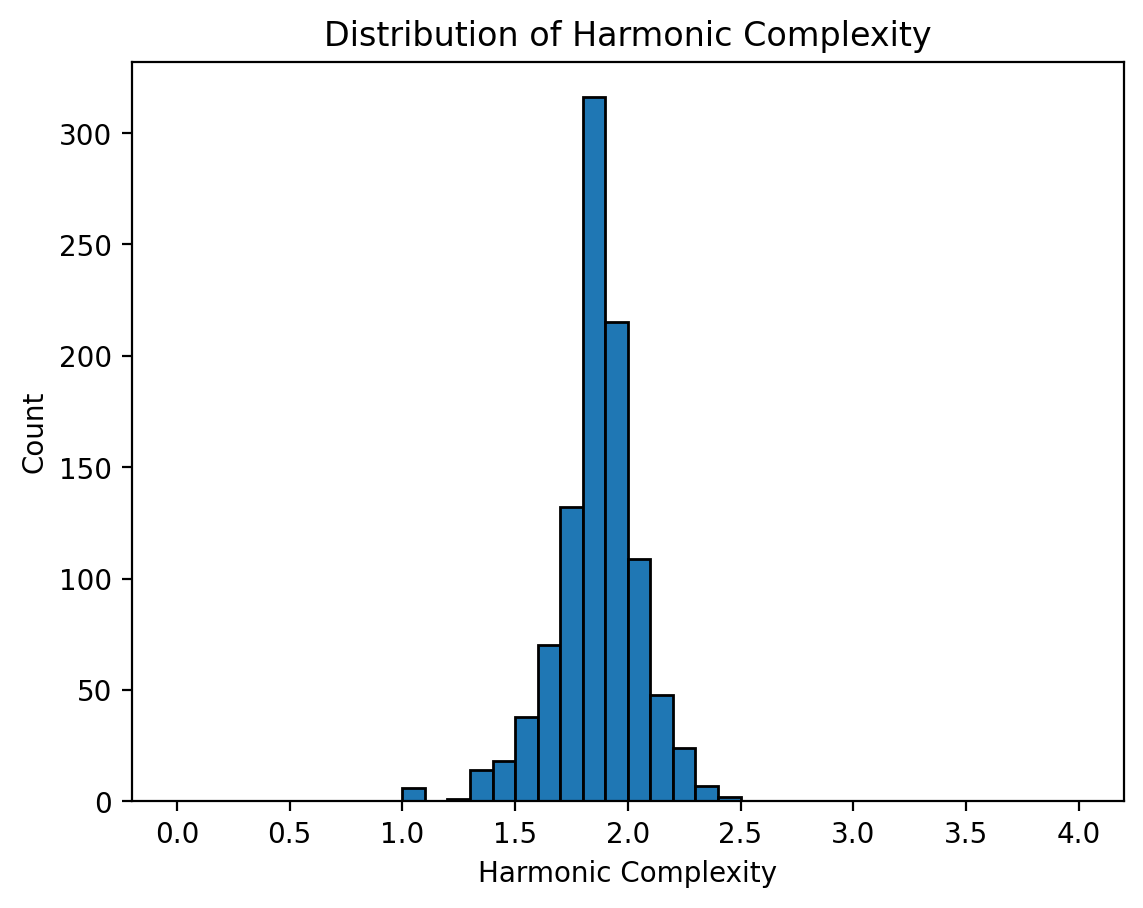

In [10]:
bins = np.arange(0, 4.1, 0.1)  # bins from 0 to 4 with step 0.1
plt.hist(h_complexity, bins=bins, edgecolor='black')
plt.xlabel('Harmonic Complexity')
plt.ylabel('Count')
plt.title('Distribution of Harmonic Complexity')
plt.show()

In [11]:
# Compute 1/3 and 2/3 quantiles
rhythm_thresholds = np.quantile(h_rhythm, [1/3, 2/3])
complexity_thresholds = np.quantile(h_complexity, [1/3, 2/3])

print("Rhythm thresholds:", rhythm_thresholds)
print("Complexity thresholds:", complexity_thresholds)

# Example: map values to categories
def to_category(x, thresholds):
    if x < thresholds[0]:
        return "low"
    elif x < thresholds[1]:
        return "medium"
    else:
        return "high"

# Apply to arrays if you want labels
rhythm_labels = [to_category(v, rhythm_thresholds) for v in h_rhythm]
complexity_labels = [to_category(v, complexity_thresholds) for v in h_complexity]


Rhythm thresholds: [1.         1.55555556]
Complexity thresholds: [1.82455738 1.92158405]


In [12]:
s.show('t')

{0.0} <music21.stream.Part 0x72da30664740>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark allegro Quarter=134>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Rest whole>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note G>
        {1.0} <music21.note.Note F>
        {1.5} <music21.note.Note E>
        {2.0} <music21.note.Note F>
        {2.5} <music21.note.Note E>
        {3.0} <music21.note.Note D>
        {3.5} <music21.note.Note C#>
    {8.0} <music21.stream.Measure 3 offset=8.0>
        {0.0} <music21.note.Note D>
    {12.0} <music21.stream.Measure 4 offset=12.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note B->
        {1.0} <music21.note.Note A>
        {1.5} <music21.note.Note G>
        {2.0} <music21.note.Note A>
        {3.0} <music21.note.Note B->
    {16.0} <music21.stream.M

In [13]:
m = m21.converter.parse('example_inputs/test_midi_constraints.mid')

In [14]:
p1 = m.parts[1]
c1 = p1.chordify()
f1 = c1.flatten()
p1.show('t')
c1.show('t')
f1.show('t')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Piano 'Piano, Piano: Piano, Piano'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest whole>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Rest whole>
{8.0} <music21.stream.Measure 3 offset=8.0>
    {0.0} <music21.note.Rest whole>
{12.0} <music21.stream.Measure 4 offset=12.0>
    {0.0} <music21.note.Rest half>
    {2.0} <music21.chord.Chord D3 F#3 A3>
{16.0} <music21.stream.Measure 5 offset=16.0>
    {0.0} <music21.note.Rest whole>
{20.0} <music21.stream.Measure 6 offset=20.0>
    {0.0} <music21.note.Rest whole>
{24.0} <music21.stream.Measure 7 offset=24.0>
    {0.0} <music21.stream.Voice 0x72da2e21efc0>
        {0.0} <music21.note.Note G>
        {0.75} <music21.note.Rest 3.25ql>
    {0.0} <music21.stream.Voice 0x72da2dfe4350>
        {0.0} <music21.chord.Chord C3 E3>
        {3.75} <music21.note